# Preliminary 

Essentially this is a time series prediction problem without complex features. 

Without prior knowledge about how the counts of receipts scanning vary across the year, the very first thing for me to do is to have some intuition about the data, 
since it could be any statistical models that outputs some forecasted outcomes, taking the historical data into consideration. 

$$ y_t \sim P_\theta ( \cdot | y_{t-1}, \ldots, y_1 )$$ 

where $P_{\theta}  \sim \{ P_\theta |  \theta \in \Theta \}$ is selected from the possible models, which is hard to specify at the beginning.

I would approach this by introducing my huge-biased intuition, which is as the following:
I don't have any featured data to study how the signals are affecting the user base and their behavior etc., therefore, it is reasonable to just assume
the total user base to be growing daily, because why not! denote the number of active users as $x_t$, this is a hidden state which cannot be observed from the database.
What you observe is the sanned receipts, which, let's say on average a user scan $R$ receipts per day, with a random fluctuation $\varepsilon_t$. 

Therefore, a reasonable way to model this is to view it as a system linear with respect to time 
$$
\begin{aligned}
 x_{t+1} & =  x_t + \gamma_t + \eta_t
 \\
y_t & =  R x_t + \varepsilon_t
 \end{aligned}
$$
and if you plug $y_t$ into the state transition, boom you get 
$$y_{t+1} =  y_t + R\varepsilon_t + \gamma_t + \eta_t$$
you don't care how the noise $R\varepsilon_t +\eta_t$ is distirbuted, but central limit theorem tells us the sample mean of it is approaching Gaussian any how, so we might as well just use Gaussian. The rest of the business is to see if $\gamma_t$ is stationary.


<Axes: title={'center': 'Receipts Count Plot'}>

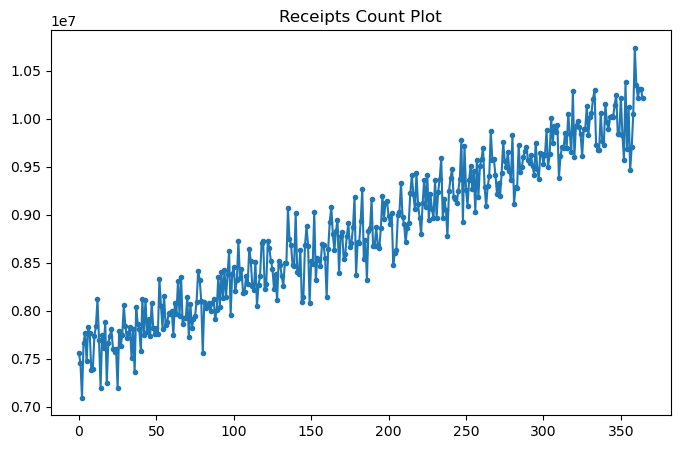

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data and visualize the anual 
data_2021 = pd.read_csv('data_daily.csv') 
data_2021['Receipt_Count'].plot(figsize=(8, 5), marker='.', title='Receipts Count Plot')

7270.3873626373625

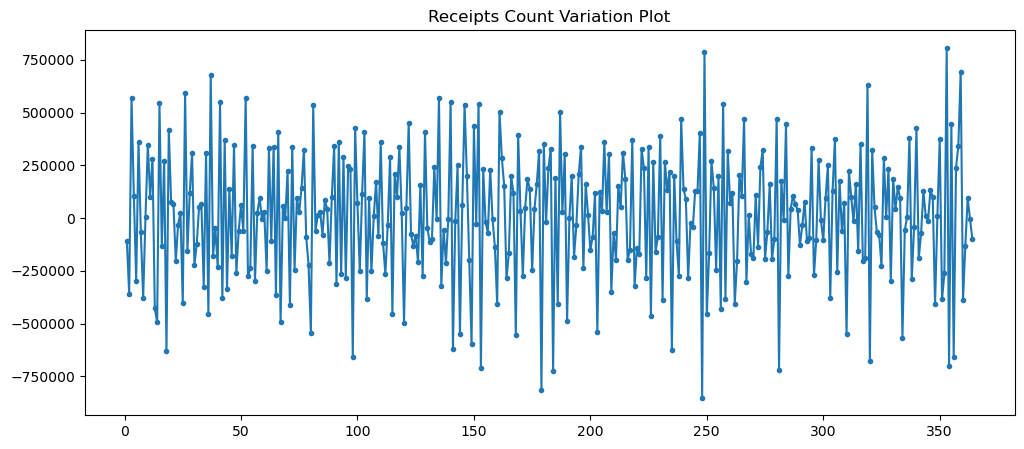

In [25]:
data_2021['Receipt_Count'].diff().plot(figsize=(12, 5), marker='.', title='Receipts Count Variation Plot')
diffseries = data_2021['Receipt_Count'].diff()
diffseries.mean()

As can be seen through visualization, clearly there's a linear trend over time, with a certain level of volatility. It makes sense as the company is growing, and there are many new comers every day. By intuition, obviously we can do mean-reverting/stationarity testing such as ADF hypothesis. 

$$DF_\tau = \frac{\hat{\eta}}{ std(\hat{\eta})}$$

where $ \hat{\eta} = \mathrm{OLS}( \Delta y, y_{\tau})$ is the sample proportionality constant, between the differences $\Delta y$ and lagged sequence $y_{\tau}$.




In [27]:
import statsmodels.tsa.stattools as ts
ts.adfuller(data_2021['Receipt_Count'])


(0.1750441657200566,
 0.9708266454651425,
 17,
 347,
 {'1%': -3.449336554273722,
  '5%': -2.8699055166063085,
  '10%': -2.571226758215748},
 9546.283513580593)


Actually why the fuss to do statistical testing, I don't even give a frankly dime. This series is visually linear with respect to time, which indicates I can take $\gamma$ as an unknown constant unless your company went bankruptcy or viral at some point.

Of course I can also use Gaussian Process to train a model. 
